In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
import xgboost as xgb 

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
df=pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")


In [17]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [18]:
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [19]:
df.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [21]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [22]:
df.shape

(349, 10)

In [23]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

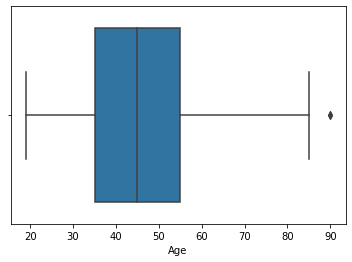

In [24]:
sns.boxplot(df['Age'])

In [25]:
q1=df['Age'].quantile(0.25)

In [26]:
q3=df['Age'].quantile(0.75)

In [27]:
IQR=q3-q1

In [28]:
lower=q1-1.5*IQR

In [29]:
upper=q3+1.5*IQR

In [30]:
df=df[(df['Age']>lower) & (df['Age']<upper)]

In [31]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
340,Testicular Cancer,No,No,Yes,No,70,Female,High,High,Positive
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive


<AxesSubplot:xlabel='Fever', ylabel='count'>

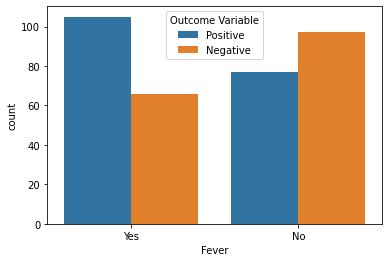

In [32]:
sns.countplot(x=df['Fever'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Cough', ylabel='count'>

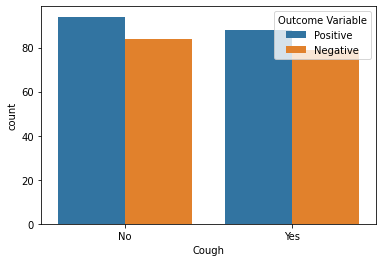

In [33]:
sns.countplot(x=df['Cough'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Fatigue', ylabel='count'>

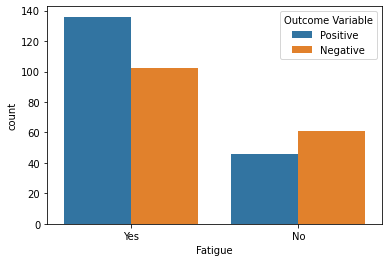

In [34]:
sns.countplot(x=df['Fatigue'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Difficulty Breathing', ylabel='count'>

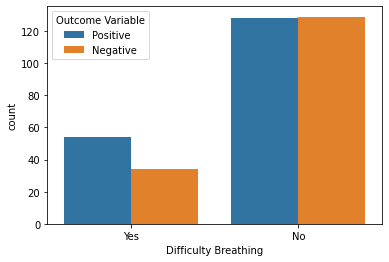

In [35]:
sns.countplot(x=df['Difficulty Breathing'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

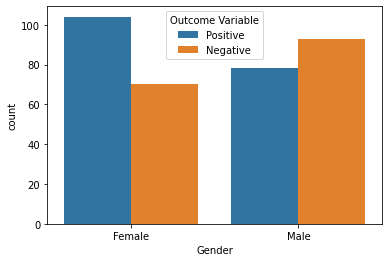

In [36]:
sns.countplot(x=df['Gender'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Blood Pressure', ylabel='count'>

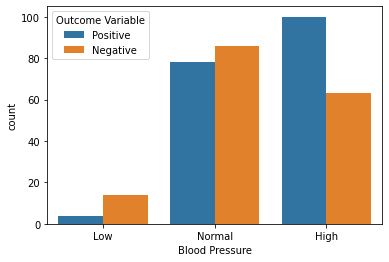

In [37]:
sns.countplot(x=df['Blood Pressure'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Cholesterol Level', ylabel='count'>

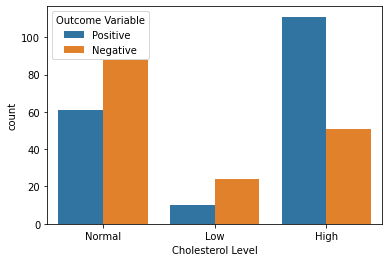

In [38]:
sns.countplot(x=df['Cholesterol Level'],hue=df['Outcome Variable'])

In [39]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


<AxesSubplot:xlabel='Outcome Variable', ylabel='Age'>

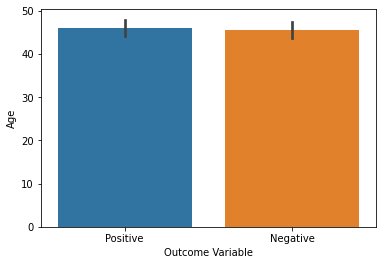

In [40]:
sns.barplot(x=df['Outcome Variable'],y=df['Age'])

<AxesSubplot:xlabel='Fever', ylabel='Age'>

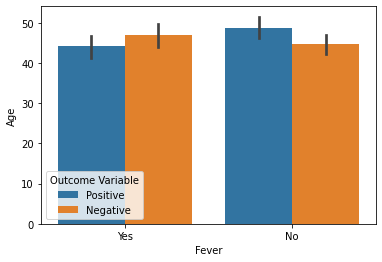

In [41]:
sns.barplot(x=df['Fever'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Cough', ylabel='Age'>

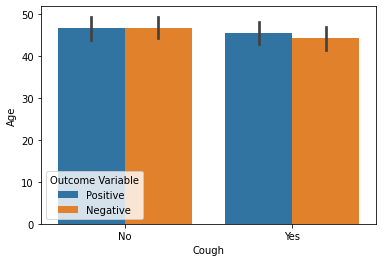

In [42]:
sns.barplot(x=df['Cough'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Fatigue', ylabel='Age'>

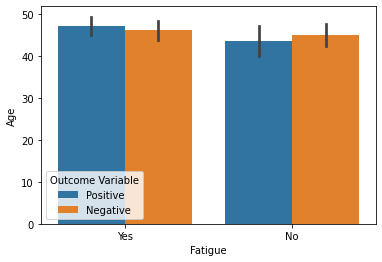

In [43]:
sns.barplot(x=df['Fatigue'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Difficulty Breathing', ylabel='Age'>

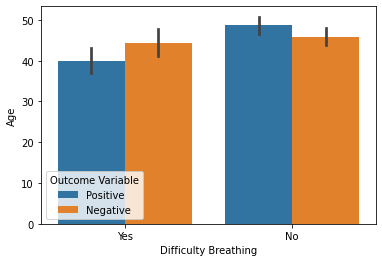

In [44]:
sns.barplot(x=df['Difficulty Breathing'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

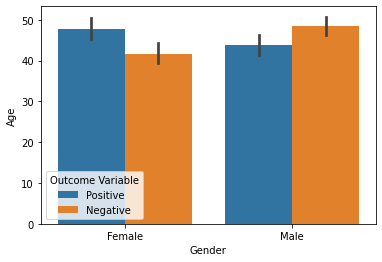

In [45]:
sns.barplot(x=df['Gender'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Blood Pressure', ylabel='Age'>

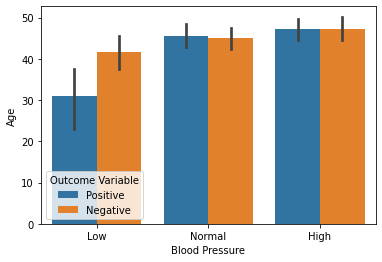

In [46]:
sns.barplot(x=df['Blood Pressure'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Cholesterol Level', ylabel='Age'>

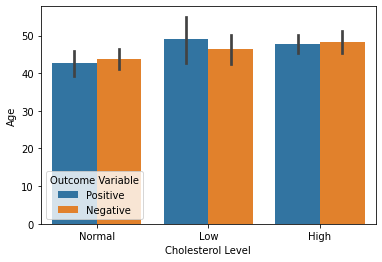

In [47]:
sns.barplot(x=df['Cholesterol Level'],y=df['Age'],hue=df['Outcome Variable'])

In [48]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
340,Testicular Cancer,No,No,Yes,No,70,Female,High,High,Positive
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive


<AxesSubplot:xlabel='Fever', ylabel='Age'>

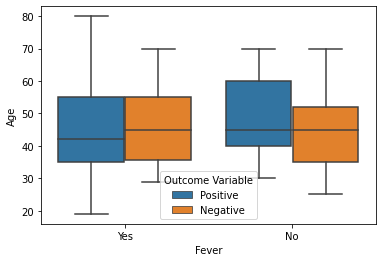

In [49]:
sns.boxplot(x=df['Fever'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Cough', ylabel='Age'>

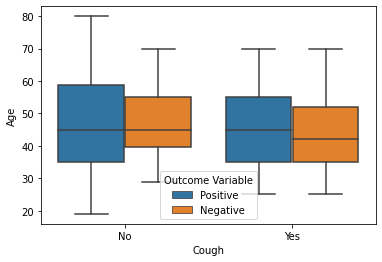

In [50]:
sns.boxplot(x=df['Cough'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Fatigue', ylabel='Age'>

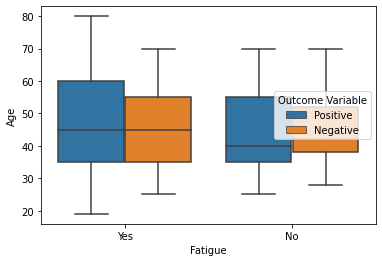

In [51]:
sns.boxplot(x=df['Fatigue'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Difficulty Breathing', ylabel='Age'>

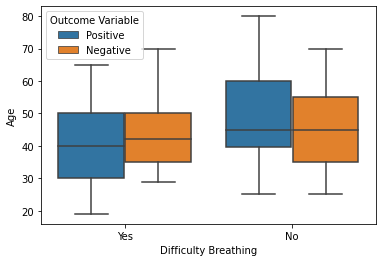

In [52]:
sns.boxplot(x=df['Difficulty Breathing'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

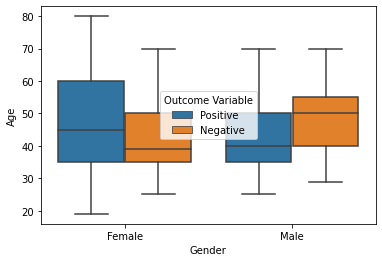

In [53]:
sns.boxplot(x=df['Gender'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Blood Pressure', ylabel='Age'>

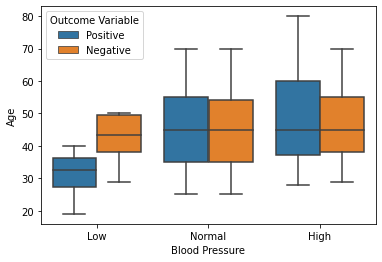

In [54]:
sns.boxplot(x=df['Blood Pressure'],y=df['Age'],hue=df['Outcome Variable'])

<AxesSubplot:xlabel='Cholesterol Level', ylabel='Age'>

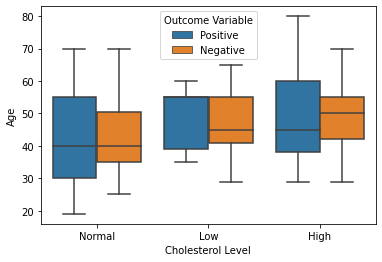

In [55]:
sns.boxplot(x=df['Cholesterol Level'],y=df['Age'],hue=df['Outcome Variable'])

In [56]:
df['Age_Range']=pd.qcut(df['Age'],4)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_15708\3966527129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Range']=pd.qcut(df['Age'],4)


In [57]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Age_Range
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,"(18.999, 35.0]"
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,"(18.999, 35.0]"
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,"(18.999, 35.0]"
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,"(18.999, 35.0]"
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,"(18.999, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...
340,Testicular Cancer,No,No,Yes,No,70,Female,High,High,Positive,"(55.0, 80.0]"
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive,"(55.0, 80.0]"
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive,"(55.0, 80.0]"
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive,"(55.0, 80.0]"


<AxesSubplot:xlabel='Age_Range', ylabel='count'>

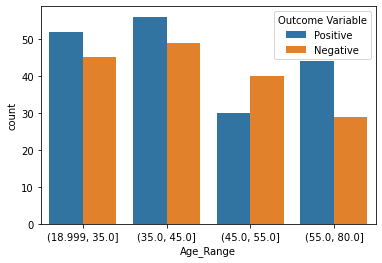

In [58]:
sns.countplot(x=df['Age_Range'],hue=df['Outcome Variable'])

In [59]:
df=df.drop('Age_Range',axis=1)


In [60]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
340,Testicular Cancer,No,No,Yes,No,70,Female,High,High,Positive
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive


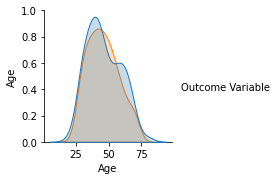

In [61]:
sns.pairplot(data=df,hue='Outcome Variable')

In [62]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

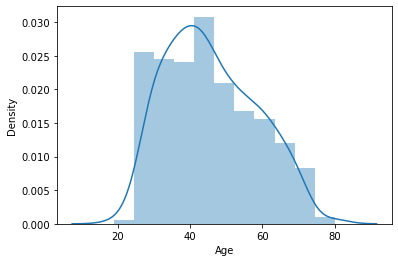

In [63]:
sns.distplot(df['Age'])

In [64]:
le=LabelEncoder()


In [65]:
df['Disease']=le.fit_transform(df['Disease'])

In [66]:
df['Fever']=le.fit_transform(df['Fever'])

In [67]:
df['Cough']=le.fit_transform(df['Cough'])

In [68]:
df['Fatigue']=le.fit_transform(df['Fatigue'])

In [69]:
df['Difficulty Breathing']=le.fit_transform(df['Difficulty Breathing'])

In [70]:
df['Gender']=le.fit_transform(df['Gender'])

In [71]:
df['Blood Pressure']=le.fit_transform(df['Blood Pressure'])

In [72]:
df['Cholesterol Level']=le.fit_transform(df['Cholesterol Level'])

In [73]:
df['Outcome Variable']=le.fit_transform(df['Outcome Variable'])

In [74]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
4,6,1,1,0,1,25,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
340,103,0,0,1,0,70,0,0,0,1
341,106,1,1,1,0,70,0,0,0,1
342,114,0,0,1,0,70,0,2,2,1
343,101,1,0,1,0,80,0,0,0,1


<AxesSubplot:>

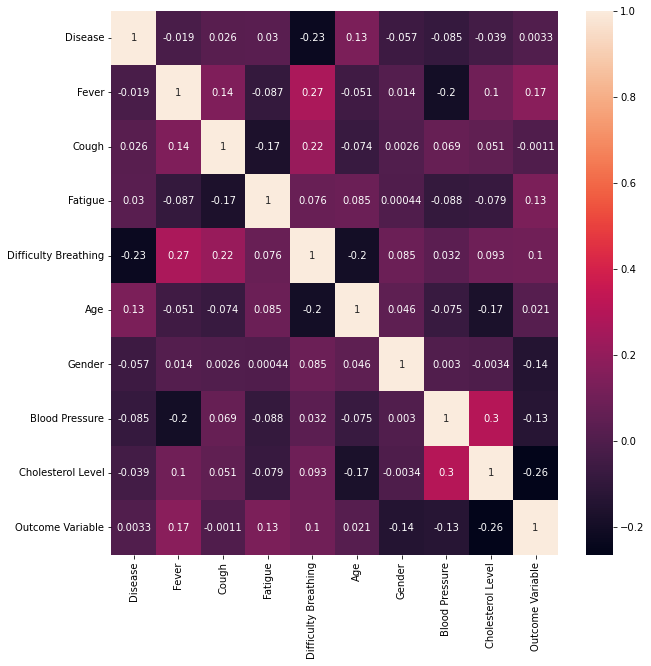

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome Variable', ylabel='count'>

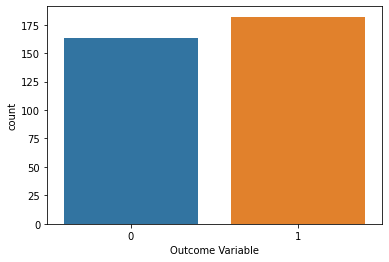

In [76]:
sns.countplot(df['Outcome Variable'])

In [77]:
df['Outcome Variable'].value_counts()

1    182
0    163
Name: Outcome Variable, dtype: int64

In [78]:
X=df.drop(['Outcome Variable'],axis=1)

In [79]:
y=df['Outcome Variable']

In [80]:
sc=StandardScaler()


In [81]:
X=sc.fit_transform(X)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
X_train.shape

(276, 9)

In [84]:
X_test.shape

(69, 9)

# LogisticRegression

In [85]:
lr=LogisticRegression()


In [86]:
lr.fit(X_train,y_train)

LogisticRegression()

In [87]:
y_pred=lr.predict(X_train)


In [88]:
accuracy_score(y_train,y_pred)

0.6485507246376812

In [89]:
y_pred=lr.predict(X_test)


In [90]:
accuracy_score(y_test,y_pred)

0.6086956521739131

In [91]:
KF=KFold(5)


In [92]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [93]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6428571428571429
1 0.7142857142857143
2 0.7142857142857143
3 0.5714285714285714
4 0.6153846153846154


In [94]:
scores.mean()

0.6516483516483518

In [95]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

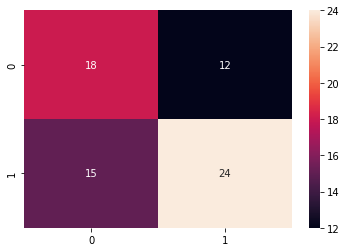

In [96]:
sns.heatmap(data=cm,fmt='d',annot=True)

# RandomForestClassifier

In [97]:
rfc=RandomForestClassifier()

In [98]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [99]:
y_pred=rfc.predict(X_train)


In [100]:
accuracy_score(y_train,y_pred)

1.0

In [101]:
y_pred=rfc.predict(X_test)


In [102]:
accuracy_score(y_test,y_pred)

0.7971014492753623

In [103]:
KF=KFold(5)


In [104]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [105]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.5714285714285714
1 0.6428571428571429
2 0.5714285714285714
3 0.6428571428571429
4 0.6923076923076923


In [106]:
scores.mean()

0.6241758241758243

In [107]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

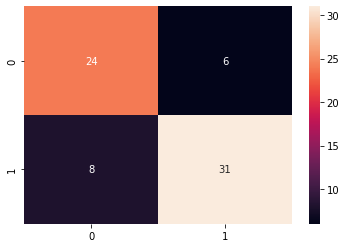

In [108]:
sns.heatmap(data=cm,fmt='d',annot=True)

# KNeighborsClassifier

In [109]:
knc=KNeighborsClassifier()


In [110]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [111]:
y_pred=knc.predict(X_train)


In [112]:
accuracy_score(y_train,y_pred)

0.7644927536231884

In [113]:
y_pred=knc.predict(X_test)


In [114]:
accuracy_score(y_test,y_pred)

0.6956521739130435

In [115]:
KF=KFold(5)


In [116]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [117]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6428571428571429
1 0.7857142857142857
2 0.6428571428571429
3 0.6428571428571429
4 0.6923076923076923


In [118]:
scores.mean()

0.6813186813186813

In [119]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

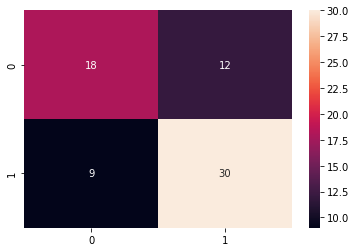

In [120]:
sns.heatmap(data=cm,fmt='d',annot=True)

# DecisionTreeClassifier

In [121]:
dtc=DecisionTreeClassifier()


In [122]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
y_pred=dtc.predict(X_train)


In [124]:
accuracy_score(y_train,y_pred)

1.0

In [125]:
y_pred=dtc.predict(X_test)


In [126]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [127]:
KF=KFold(5)


In [128]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)


In [129]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7142857142857143
1 0.6428571428571429
2 0.5714285714285714
3 0.5714285714285714
4 0.6923076923076923


In [130]:
scores.mean()

0.6384615384615385

In [131]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

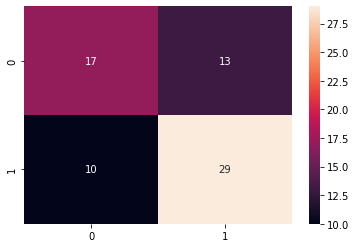

In [132]:
sns.heatmap(data=cm,fmt='d',annot=True)

# XGBClassifier

In [133]:
xgb_i=xgb.XGBClassifier()

In [134]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [135]:
y_pred=xgb_i.predict(X_train)


In [136]:
accuracy_score(y_train,y_pred)

1.0

In [137]:
y_pred=xgb_i.predict(X_test)


In [138]:
accuracy_score(y_test,y_pred)

0.7101449275362319

In [139]:
KF=KFold(5)


In [140]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [141]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.5714285714285714
1 0.42857142857142855
2 0.7142857142857143
3 0.6428571428571429
4 0.6923076923076923


In [142]:
scores.mean()

0.6098901098901098

In [143]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

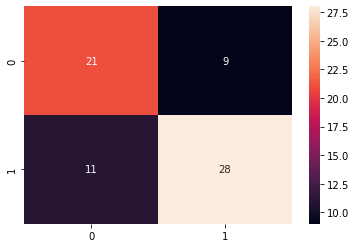

In [144]:
sns.heatmap(data=cm,fmt='d',annot=True)

# ANN

In [145]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(9,),activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')   
])

In [146]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy')

In [147]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 0.6871 - accuracy: 0.5761
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6087
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6196
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6486
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6957
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6957
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.6848
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.6993
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7065
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7138
Epoch 11/100
9/9 [===========

In [148]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.6156 - accuracy: 0.7246


[0.6156160235404968, 0.7246376872062683]

In [149]:
y_pred=model.predict(X_test)


3/3 [==============================] - 0s 3ms/step


In [150]:
y_pred[:10]

array([[0.312193  ],
       [0.9935285 ],
       [0.9968086 ],
       [0.5722361 ],
       [0.98855674],
       [0.18338367],
       [0.9980132 ],
       [0.48989648],
       [0.06760833],
       [0.00489382]], dtype=float32)

In [151]:
ypred=[]
for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)
        

In [152]:
ypred[:10]

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0]

In [153]:
y_test[:10]

194    1
157    1
225    1
208    0
319    1
335    0
320    1
261    1
114    0
220    0
Name: Outcome Variable, dtype: int32